In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_decision_boundary(svm_clf , x_min , x_max):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_
    x0 = np.linspace(x_min , x_max , 200)
    decision_boundary = -w[0]/w[1]*x0-b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    sv = svm_clf.support_vectors_
    plt.scatter(sv[:,0] , sv[:,1] , s = 180 , facecolors = 'y')
    plt.plot(x0,decision_boundary,'k-')
    plt.plot(x0,gutter_up,'k--')
    plt.plot(x0,gutter_down,'k--')

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
df = load_iris()
X = df['data'][:,(2,3)]
Y = df['target']
setosa_or_versicolor = (Y == 0) | (Y == 1)
X = X[setosa_or_versicolor]
Y = Y[setosa_or_versicolor]
svm_clf = SVC(kernel = 'linear' , C = float('Inf'))
svm_clf.fit(X,Y)
svm_clf.predict([[2.4 , 1.2]])

array([1])

(-2.0, 2.0, -2.0, 2.0)

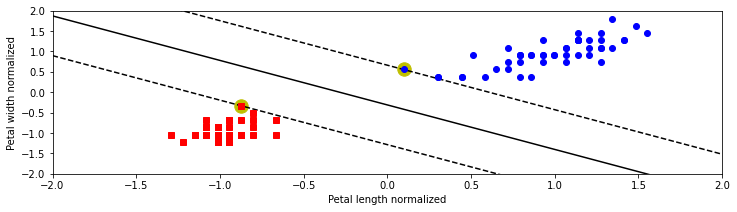

In [7]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize = (12,3))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled , Y)
plot_decision_boundary(svm_clf , -2 , 2 )
plt.plot(X_scaled[:,0][Y==0],X_scaled[:,1][Y==0],'rs')
plt.plot(X_scaled[:,0][Y==1],X_scaled[:,1][Y==1],'bo')
plt.xlabel("Petal length normalized")
plt.ylabel("Petal width normalized")
plt.axis([-2,2,-2,2])